In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
import numpy as np
import pandas as pd

df = get_data('gexp').data 
df.head(10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,A,B,C,D,E,F
0,4.505700,3.260360,-1.249400,8.898070,8.059550,-0.842803
1,3.508560,1.660790,-1.856680,-2.573360,-1.373700,1.196000
2,4.447010,3.411940,-1.040870,10.271195,10.517256,0.272272
3,2.160030,3.146520,0.982809,9.024300,6.058320,-2.967420
4,2.357010,0.452589,-1.910680,12.984239,10.019605,-2.939020
5,-2.459720,0.046093,2.503280,1.273410,4.213880,2.934790
6,4.294885,8.095719,3.718490,0.586062,0.236484,-0.354185
7,1.884750,2.295690,0.408891,-3.914040,-2.280490,1.628820
8,0.255193,-0.761204,-1.022350,3.650590,2.465250,-1.188140
9,0.664181,1.567450,0.895807,3.729630,3.773390,0.039013


In [ ]:
df_st =  StandardScaler().fit_transform(df)  
pd.DataFrame(df_st, columns=df.columns).head(10)

,A,B,C,D,E,F
0,0.619654,0.448280,-0.240867,2.457058,2.304732,-0.331489
1,0.342286,-0.041499,-0.428652,-1.214732,-0.877151,0.474930
2,0.603329,0.494693,-0.176385,2.896569,3.133729,0.109563
3,-0.032825,0.413423,0.449383,2.497462,1.629707,-1.171850
4,0.021968,-0.411444,-0.445350,3.764964,2.965869,-1.160617
5,-1.317869,-0.535911,0.919548,0.016547,1.007568,1.162683
6,0.561013,1.928841,1.295318,-0.203460,-0.334028,-0.138223
7,-0.109398,0.152904,0.271915,-1.643858,-1.183016,0.646125
8,-0.562680,-0.783101,-0.170658,0.777438,0.417746,-0.468082
9,-0.448915,-0.070080,0.422480,0.802737,0.858989,0.017300


In [ ]:
pca_out = PCA().fit(df_st)

# get the component variance
# Proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_

array([0.2978742 , 0.27481252, 0.23181442, 0.19291638, 0.00144353,
       0.00113895])

$s$ componentes principales que se obtienen a partir de $r$ observaciones. 
$$\lambda_{s}+\cdots +\lambda_{r}/tr(\Sigma)$$

In [ ]:
np.cumsum(pca_out.explained_variance_ratio_)

array([0.2978742 , 0.57268672, 0.80450114, 0.99741752, 0.99886105,
       1.        ])

In [ ]:
loadings = pca_out.components_

loadings 

array([[-0.51089776, -0.0859082 ,  0.47747704,  0.37031821,  0.56849089,
         0.20809005],
       [ 0.4522338 ,  0.40119707, -0.10099405,  0.61148547,  0.30011752,
        -0.40042564],
       [ 0.22735615,  0.7085559 ,  0.46243668, -0.30829455, -0.01177538,
         0.37044008],
       [-0.32346414,  0.13278818,  0.48795135,  0.05497302, -0.48411477,
        -0.63423386],
       [ 0.61488056, -0.55844771,  0.55660523, -0.0076422 ,  0.00938237,
        -0.0101115 ],
       [ 0.00837202, -0.01061558,  0.00789269,  0.62515916, -0.59342546,
         0.50673185]])

In [ ]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
A,-0.510898,0.452234,0.227356,-0.323464,0.614881,0.008372
B,-0.085908,0.401197,0.708556,0.132788,-0.558448,-0.010616
C,0.477477,-0.100994,0.462437,0.487951,0.556605,0.007893
D,0.370318,0.611485,-0.308295,0.054973,-0.007642,0.625159
E,0.568491,0.300118,-0.011775,-0.484115,0.009382,-0.593425
F,0.208090,-0.400426,0.370440,-0.634234,-0.010111,0.506732


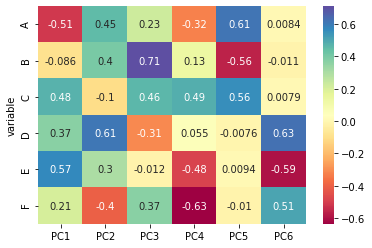

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [ ]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca_out.explained_variance_ratio_])

In [ ]:
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=df.columns.values, 
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

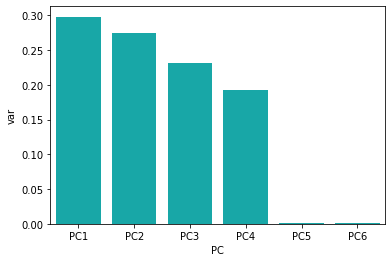

In [ ]:
df = pd.DataFrame({'var':pca_out.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="var", 
           data=df, color="c");

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = px.data.iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['species'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()